# 1.2 Compound Data Types

* list 可以用來儲存一連串有順序性的元素

* list 是做好数据分析的第一步，所以掌握好串列非常重要。

In [110]:
X1 = [2.874,3.278]  # 生成串列
print(X1)            
print(type(X1))      # 查看串列类型
X2 = [3,4,5]
print(X2)
X = X1+X2           # 串列相加，相当于将两个串列拼接
print(X)
X = X * 2           # 串列和数字2相乘，是将串列重复2次
print(X)        
X.pop()             # 删除数列最后一位元素，默认为-1。如果输入0，则删除第一位元素
print(X)
X.remove(3)         # 删除数列中第一次出现值，3
print(X)
del X[4]            # 删除第5位元素
print(X)
del X[3:]           # 删除第3元素到最后的元素
print(X)
print(X[0])         # 查看串列内的数字，注意的是串列位置索引是从 0 开始的
print(X[-1])        # 当串列很长时，可以从后索引，用负数。
print(X[0:2])       # 可以得到前两个数字
print(len(X))       # 查看 X 数列内有几个数字
print(X)
print(X[1:3])       # 可以查看第 2 个到第 3 个元素
print(X[-3:-1])     # 可以查看倒数第 3 到倒数第 2 的数字
X.append(5)         # 在数列后面增加数字
print(X)
X[2]=3.337          # 更改串列 X 中的第 3 个数字
X[-1]=3.679          # 更改串列 X 中的最后一个个数字
print(X)
X.insert(3,3.39)    # 插入 3.39 到第4位
print(X)

[2.874, 3.278]
<class 'list'>
[3, 4, 5]
[2.874, 3.278, 3, 4, 5]
[2.874, 3.278, 3, 4, 5, 2.874, 3.278, 3, 4, 5]
[2.874, 3.278, 3, 4, 5, 2.874, 3.278, 3, 4]
[2.874, 3.278, 4, 5, 2.874, 3.278, 3, 4]
[2.874, 3.278, 4, 5, 3.278, 3, 4]
[2.874, 3.278, 4]
2.874
4
[2.874, 3.278]
3
[2.874, 3.278, 4]
[3.278, 4]
[2.874, 3.278]
[2.874, 3.278, 4, 5]
[2.874, 3.278, 3.337, 3.679]
[2.874, 3.278, 3.337, 3.39, 3.679]


# 1.4 User-Defined Functions
## 灰色預測模型函數
* Grey system theory was proposed to study the uncertainty problems with small data and incomplete information by Professor Deng in 1982. The grey system theory is being used widely, such as testing and analysis system, solving the problem of classification of system elements and objects, evaluating and selecting schemes, etc. . It is noteworthy that the most widely used and studied area is the system forecasting by using grey system forecasting model. GM(1,1) model is the core model of grey system prediction model, which is widely used in the fields of industry, agriculture, water conservancy, energy and economy. The advantage of GM (1,1) model is that it can use small sample data (at least 4 sample data) to establish a system prediction model, and the calculation of the model is convenient and simple.

输入的原始序列 x0 = [2.874, 3.278, 3.337, 3.39, 3.679] 
发展系数 a = -0.037 
灰色作用量 b = 3.065 
平均相对误差 MAPE = 1.538% 
模拟数据 xs = [2.874, 3.231, 3.353, 3.479, 3.61] 
预测未来3步的值 xf = [3.746, 3.887, 4.034]


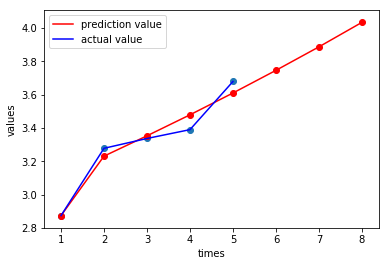

In [111]:
# 導入相關套件
%matplotlib inline                                            
import numpy as np
import matplotlib.pyplot as plt
from numpy import *


# 下函數的主要功能是實現利用灰色預測GM(1,1)模型進行預測，只需要輸入原始序列和預測步長，就可以輸出相關數據結果和對比圖示。

def GM11(x0,t):                                                 
    
    # 計算原始序列的 1-AGO
    x1=[]
    k=0
    for i in x0:                                             
        k=k+i
        x1.append(k)
    n=len(x1)
    
    # 對 x1 做緊鄰均值生成序列 z1
    z1=[]
    for i in list(range(1,n)):                               
        z1.append((x1[i-1]+x1[i])*0.5)
    m=len(z1)
    
    # 求矩陣 B 和 Y
    X0=np.mat(x0).T
    Y=X0[1:n]
    Z1=np.mat(z1).T
    B=np.mat(ones((m,2)))
    for i in list(range(0,m)):
        B[i,0]=Z1[i]
        
    # 用最小二乘法計算 a（發展係數）和 b（灰色作用量）的值。**這裏有一個問題就是生成的 a 的值與正確值互爲相反數，函數還需要進一步改進。
    E=(np.linalg.inv(B.T*B))*B.T*Y
    a=round(E[0,0],3)*-1
    b=round(E[1,0],3)
    
    # 計算模擬數據 xs
    xs=[x0[0]]
    for k in list(range(2,n+1)):
        xs.append(round((1-exp(a))*
                        (x0[0]-(b/a))*exp((-a)*(k-1)),3))
    # 計算後續 t 個預測值 xf
    xf=[]
    for k in list(range(n+1,t+n+1)):
        xf.append(round((1-exp(a))*
                        (x0[0]-(b/a))*exp((-a)*(k-1)),3))
    
    # 計算誤差序列 e 與平均相對誤差 MAPE
    e=[]
    for i in  list(range(0,n)):
        e.append(abs(x0[i]-xs[i])/x0[0])
    MAPE=round(sum(e)/n,5)
    
    # 輸出相關結果數據
    A0="输入的原始序列 x0 = {}".format(x0)
    A1="\n发展系数 a = {}".format(a)
    A2="\n灰色作用量 b = {}".format(b)
    A3="\n平均相对误差 MAPE = {}%".format(MAPE*100)
    A4="\n模拟数据 xs = {}".format(xs)
    A5="\n预测未来{}步的值 xf = {}".format(t,xf)
    print(A0,A1,A2,A3,A4,A5)
    A=A0+A1+A2+A3+A4+A5
    
    # 将相关数据输出到 word 文档中
    with open('GM11.doc', 'w') as f:
        f.write(A)
    
    # 根據函數數據結果輸出實際值與模擬值和預測值的對比圖，并将图片保存在本地。
    plt.scatter(list(range(1,n+1)),x0)
    plt.scatter(list(range(1,n+1+t)),xs+xf,c="red")
    l1=plt.plot(list(range(1,n+1+t)),xs+xf,"r")
    l2=plt.plot(list(range(1,n+1)),x0,"b")
    plt.xlabel("times")
    plt.ylabel("values")
    plt.legend(["prediction value","actual value"])
    plt.savefig("Fitting lines of forecast values and actual values")
    
# 輸入原始數據 x0 和預測步長 t，这里的 x0 用到 上个代码块 1.2 中的结果
x0=X
t=3

GM11(x0,t)

#------------------------------------------------------------------------------------------------------------------------------------
# 該函數還有很多地方需要改進，但是由於時間關係和本人對Python的研究還是剛剛起步，有許多基礎的地方還沒有完善好。

# 1） 在輸入數據的有效性方面還需加强，如預測步長 t 需要輸入大於零的整數，如果輸入其他值，可以具備提醒使用者輸入正確數據功能。
# 2） 圖形美觀性還需加强，比如在散點上顯示數值。
# 3） 函數很多代碼很不簡潔，需要改進。
# 4)  輸入數據的輸入方式上或許有更好的方法
# 5） 现在仅仅是将输出结果保存在 word 文档和 png图片文件中，后续可以所有结果都输入到 word 文档或者 PDF 文档中
# 6） 不完善的地方還有很多，例如如何将函数输出的结果保留，但是現在水平有限，或許在本門課程的學習過程中，可以對這個函數不斷精進。


# 1.5 File I/O
* 图片的读取，显示与保存
* 文档的读取，保存

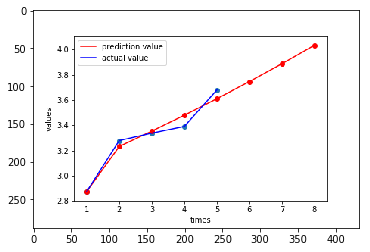

In [112]:
import matplotlib.image as imp 

# 读取在上一步刚刚保存的图片
image = imp.imread('Fitting lines of forecast values and actual values.png')

# 将读取的图片显示出来
plt.imshow(image)

# 重新保存图片，更改图片名称和图片类型
plt.savefig('image.jpg')

# 重新读取图片时发现图片清晰度有所下降，这里还有待找出原因并进行改进。

In [113]:
# 1.4 中输出结果没有编号，不利于阅读，当前代码块为读取 GM11.doc 文档，将输出结果进行编号，并同时将新的输出保存在 gm11.txt 文件中。

with open('gm11.txt', 'w+') as h:          
    with open('GM11.doc', 'r') as g:           #打开 GM11.doc 文件，读出文件内容
        c = 0
        for gm in g:                          
            c=c+1
            gm11="{}、{}".format(c,gm)         # 对文档内容进行编号
            
            # 将 gm11 的内容插入到txt文档当中，h.seek(0,2) 中，2是文档最末尾，如果此位置为1则是当前位置，如果为0则是开头位置。
            content = h.read()                 
            h.seek(0, 2)                       
            h.write(gm11+content)
            print(gm11)

1、输入的原始序列 x0 = [2.874, 3.278, 3.337, 3.39, 3.679]

2、发展系数 a = -0.037

3、灰色作用量 b = 3.065

4、平均相对误差 MAPE = 1.538%

5、模拟数据 xs = [2.874, 3.231, 3.353, 3.479, 3.61]

6、预测未来3步的值 xf = [3.746, 3.887, 4.034]
